In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import numpy as np
from sklearn.linear_model import LinearRegression
from arch.unitroot import ADF

In [5]:
mt5.initialize()

True

In [105]:
symbols = ['EURUSD','GBPUSD','USDJPY','USDCHF','AUDUSD','NZDUSD', 'USDCAD', 'AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD',
            'CADCHF', 'CADJPY', 'CHFJPY', 'EURAUD', 'EURCAD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURNZD', 'GBPAUD', 'GBPCAD',
            'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDJPY']

In [106]:
df = pd.DataFrame()

In [107]:
for i in symbols:
    rates = mt5.copy_rates_from_pos(i, mt5.TIMEFRAME_D1, 0, 250)
    df[i] = [y[4] for y in rates]

In [108]:
df

,EURUSD,GBPUSD,USDJPY,USDCHF,AUDUSD,NZDUSD,USDCAD,AUDCAD,AUDCHF,AUDJPY,...,EURCHF,EURGBP,EURJPY,EURNZD,GBPAUD,GBPCAD,GBPCHF,GBPJPY,GBPNZD,NZDJPY
0,1.10849,1.21298,107.332,0.99019,0.68021,0.65539,1.32113,0.89860,0.67358,73.002,...,1.09769,0.91370,118.978,1.69120,1.78303,1.60234,1.20109,130.188,1.85037,70.344
1,1.11055,1.21593,106.632,0.98239,0.67976,0.65347,1.32002,0.89727,0.66781,72.484,...,1.09095,0.91309,118.414,1.69900,1.78812,1.60519,1.19453,129.657,1.86018,69.687
2,1.12029,1.21396,105.948,0.97316,0.67566,0.65295,1.32134,0.89280,0.65763,71.590,...,1.09024,0.92270,118.696,1.71588,1.79656,1.60416,1.18150,128.622,1.85899,69.176
3,1.12017,1.21687,106.460,0.97619,0.67584,0.65248,1.32735,0.89710,0.65973,71.949,...,1.09349,0.92045,119.252,1.71680,1.80042,1.61516,1.18780,129.544,1.86489,69.459
4,1.11994,1.21425,106.273,0.97537,0.67595,0.64445,1.33028,0.89915,0.65932,71.836,...,1.09237,0.92216,119.022,1.73790,1.79614,1.61520,1.18432,129.043,1.88399,68.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.13428,1.25536,107.287,0.94170,0.69394,0.65390,1.36079,0.94430,0.65348,74.447,...,1.06812,0.90351,121.692,1.73460,1.80901,1.70827,1.18215,134.682,1.91968,70.156
246,1.13999,1.25544,107.230,0.93995,0.69767,0.65314,1.36142,0.94981,0.65575,74.808,...,1.07151,0.90800,122.242,1.74531,1.79941,1.70924,1.17999,134.629,1.92211,70.037
247,1.14115,1.25886,106.944,0.94440,0.70072,0.65707,1.35089,0.94656,0.66179,74.937,...,1.07773,0.90649,122.039,1.73667,1.79644,1.70054,1.18890,134.627,1.91567,70.267
248,1.13822,1.25542,107.277,0.94580,0.69721,0.65352,1.35739,0.94637,0.65940,74.793,...,1.07641,0.90660,122.103,1.74145,1.80058,1.70412,1.18737,134.677,1.92066,70.108


In [109]:
rets = df.pct_change()
corr = rets.corr()

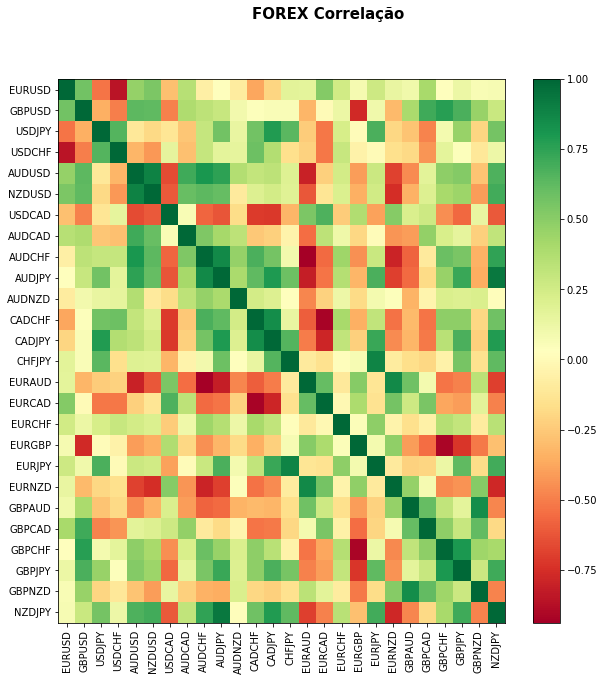

In [110]:
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('FOREX Correlação', fontsize=15, fontweight='bold')
plt.show()

In [111]:
lista = []
cont = 0
cont_total = 0
for correlacao in corr:
    for i in range(len(corr[correlacao])):
        if corr[correlacao][i]> 0 and corr[correlacao][i] != 1 and cont > i:
            lista.append(correlacao + '/' + symbols[i])
            cont_total += 1
    cont += 1

In [ ]:
lista

In [4]:
AUDJPY = pd.read_csv('data/AUDJPYmicroD1.csv')
NZDJPY = pd.read_csv('data/NZDJPYmicroD1.csv')
AUDJPY

,Unnamed: 0,Date,Open,High,Low,Close
0,0,2013-01-02,90.099,91.736,89.827,91.709
1,1,2013-01-03,91.711,91.738,91.098,91.276
2,2,2013-01-04,91.279,92.456,91.273,92.361
3,3,2013-01-07,92.301,92.823,91.745,92.204
4,4,2013-01-08,92.201,92.233,91.170,91.407
...,...,...,...,...,...,...
2011,2011,2020-09-11,77.004,77.571,76.939,77.281
2012,2012,2020-09-14,77.201,77.334,76.941,77.016
2013,2013,2020-09-15,77.019,77.492,76.771,76.966
2014,2014,2020-09-16,76.938,77.169,76.429,76.648


In [114]:
x = []
y = []
for i in range(len(AUDJPY['CLOSE'])):
    x.append([AUDJPY['CLOSE'][i]])
    y.append([NZDJPY['CLOSE'][i]])

In [115]:
reg = LinearRegression().fit(x, y)

In [116]:
previsao = reg.predict(x)

In [117]:
residuos = y - previsao

In [ ]:
residuos

## Teste Dickey-Fuller

In [119]:
adf = ADF(residuos)

In [120]:
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.828
P-value                         0.366
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [2]:
print(adf.stat)

NameError: name 'adf' is not defined